<center style = "color:#e85046"><h1><u> WORLD LIFE EXPENTENCY AND IT'S DEPENDENT FACTORS</u></h1></center>

<img src="world.gif" width="750" align="center">

# Understanding the Research Context

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries.

The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website. Among all categories of health-related factors only those critical factors were chosen which are more representative. 

It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc.

# Experimental Design

Below are the steps that will be conducted in this analysis in order to fulfill the project goal satisfactorily:

1. Load data and preview preliminary characteristics of the dataset

2. Data cleaning (check for and deal with outliers, anomalies and missing data)

3. Perform univariate and bivariate analysis

4. Specify the null and alternate hypotheses

5. Perform hypothesis testing

6. Discuss the hypothesis test results

7. Provide project summary and conclusion

# General Information of the Data
<b>Country</b> : Country<br>
<b>Year</b> : Year<br>
<b>Status</b> : Developed or Developing status of the country<br>
<b>Life expectancy</b> : Number of years a person is expected to live.<br>
<b>Adult Mortality</b> : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)<br>
<b>infant deaths</b> : Number of Infant (very young child or baby) Deaths per 1000 population<br>
<b>Alcohol</b> : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)<br>
<b>Percentage</b> : Expenditure on health as a percentage of Gross Domestic Product per capita(%)<br>
<b>Hepatitis B</b> : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)<br>
<b>Measles</b> : Measles - number of reported cases<br>
<b>BMI</b> : Average Body Mass Index of entire population<br>
<b>Under-five deaths</b> : Number of under-five deaths per 1000 population<br>
<b>Polio</b> : Polio (Pol3) immunization coverage among 1-year-olds (%)<br>
<b>Total expenditure</b> : General government expenditure on health as a percentage of total government expenditure (%)<br>
<b>Diphtheria</b> : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)<br>
<b>HIV/AIDS</b> : Deaths per 1 000 live births HIV/AIDS (0-4 years)<br>
<b>GDP</b> : Gross Domestic Product per capita (in USD)<br>
<b>Population </b>: Population of the country<br>
<b>Thinness 1-19 years</b> : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )<br>
<b>Income composition of resources</b> : Human Development Index in terms of income composition of resources (index ranging <b>from 0 to 1)<br>
Thinness 5-9 years</b> : Prevalence of thinness among children for Age 5 to 9(%)<br>
<b>Schooling</b> : Number of years of Schooling(years).


# Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import plotly.express as px
import plotly.io as pio
import scikit_posthocs
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading data from the source (csv file)

df = pd.read_csv('Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Checking the Data

In [3]:
# Checking the top 5 records of the dataset

df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Checking the bottom 5 records of the dataset

df = pd.read_csv('Life Expectancy Data.csv')
df.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
# Previewing a random sample of the dataset

df.sample(n=5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1286,Italy,2011,Developed,82.0,6.0,2,6.98,5439.691769,96.0,5189,...,96.0,9.27,96.0,0.1,38334.684770,59379449.0,0.5,0.5,0.872,16.4
289,Bhutan,2014,Developing,69.4,216.0,0,0.01,209.392134,99.0,0,...,98.0,3.57,99.0,0.5,2522.796800,776448.0,15.7,16.2,0.596,12.5
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
996,Germany,2013,Developed,86.0,71.0,2,10.94,895.877950,88.0,1771,...,94.0,11.16,95.0,0.1,4653.911430,864565.0,1.1,1.1,0.919,16.9
1373,Kenya,2004,Developing,53.0,432.0,72,1.43,36.297752,73.0,20,...,73.0,4.29,73.0,13.2,458.884355,3574931.0,8.7,8.6,0.461,8.9


In [6]:
# Checking the no. of rows and columns
df.shape

(2938, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

We can see that Year column in of dtype int64, let's convert it into object

In [8]:
df['Year'] = df['Year'].apply(str)
df.rename(columns = {' thinness  1-19 years': 'thinness 10-19 years'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   object 
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Missing Values

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
thinness 10-19 years                34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df.dropna(axis=0, how='any', subset =['Population', 'GDP'], inplace=True)

In [12]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      2
Adult Mortality                      2
infant deaths                        0
Alcohol                            146
percentage expenditure               0
Hepatitis B                        473
Measles                              0
 BMI                                24
under-five deaths                    0
Polio                               11
Total expenditure                  142
Diphtheria                          11
 HIV/AIDS                            0
GDP                                  0
Population                           0
thinness 10-19 years                24
 thinness 5-9 years                 24
Income composition of resources      1
Schooling                            0
dtype: int64

# Types of Data

### Qualitative

In [13]:
cat_cols = [df.columns[i] 
            for i in range(0, df.shape[1]-1)  
            if df.iloc[:,i].dtype=='O']
cat_cols

['Country', 'Year', 'Status']

### Quantitative

In [14]:
num_cols = [c for c in df.columns if c not in cat_cols]
num_cols

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 'thinness 10-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

# Outliers

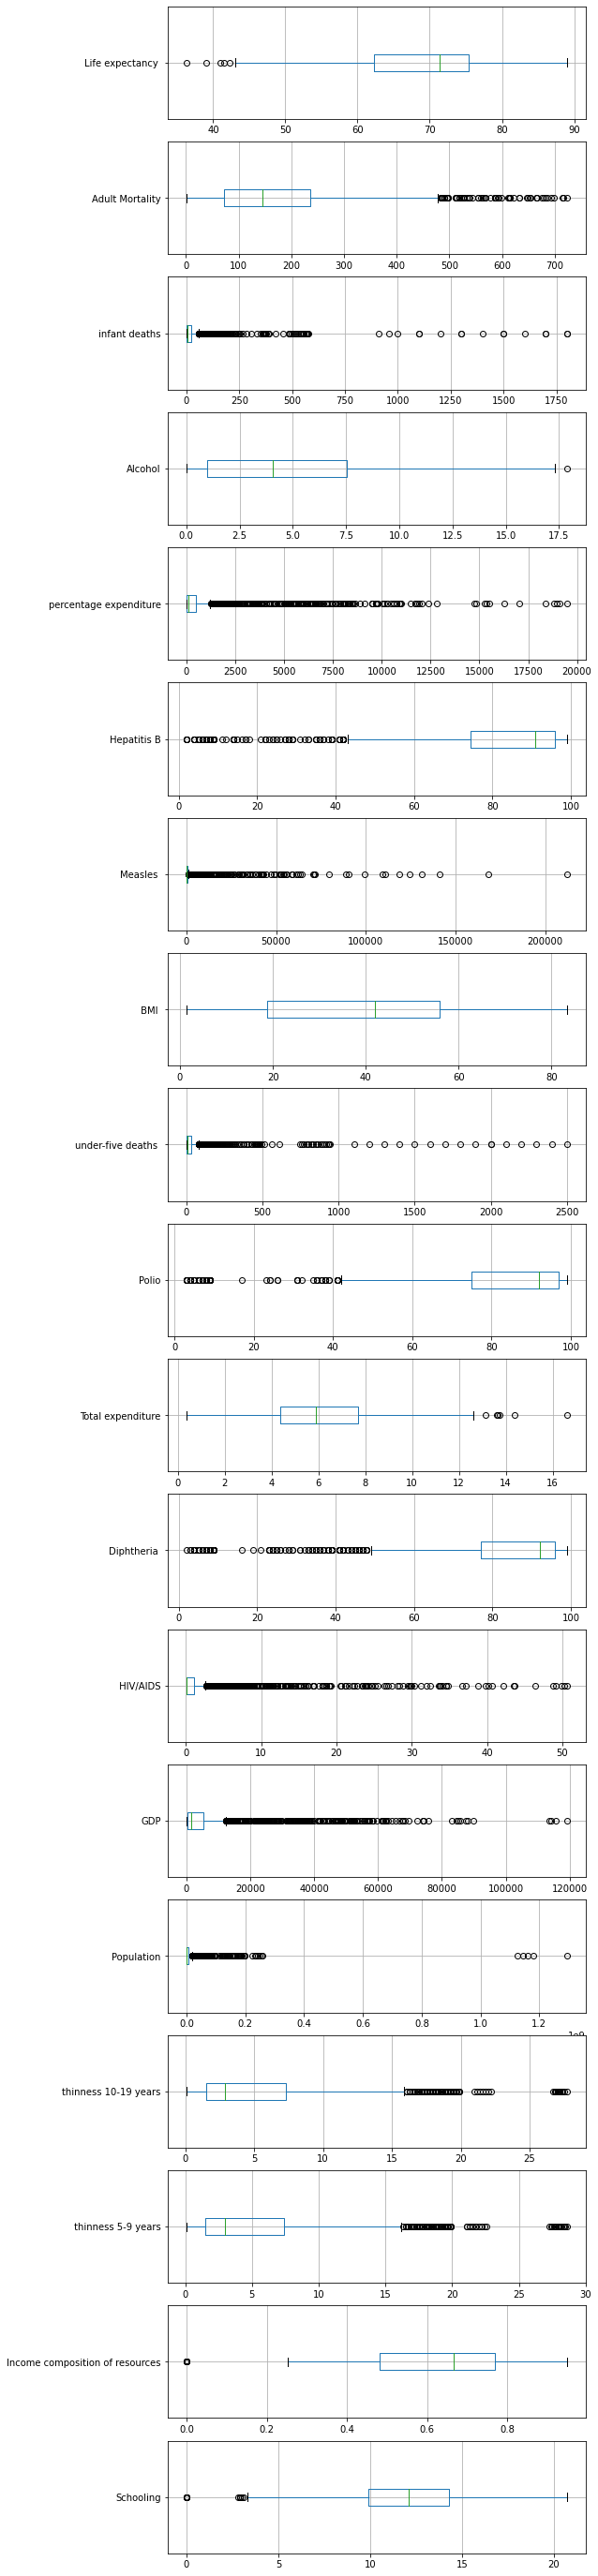

In [15]:
fig, axes = plt.subplots(len(num_cols),1,figsize=(8,50))
for i,c in enumerate(df[num_cols]):
    df[[c]].boxplot(ax=axes[i], vert=False)

### Conclusion:

1.Outliers are absent in BMI


2.Less outliers in Lower Fence - LIFE EXPECTANCY, INCOME COMPOSITION OF RESOURCES, SCHOOLING.


3.More outliers in Lower Fence - HEPATITIS B, POLIO, DIPTHERIA.


4.Less outliers in Upper Fence - ALCOHOL, TOTAL EXPENDITURE.


5.More outliers in Upper Fence - ADULT MORTALITY, INFANT DEATHS, PERCENTAGE EXPENDITURE, MEASLES, UNDER-FIVE DEATHS, HIV/AIDS, GDP, POPULATION, THINNESS 1-19 YEARS, THINNESS 5-9 YEARS.


Hence Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in  misleading interpretations.


# Data Cleaning

In [16]:
print('Max of infant deaths: ',df['infant deaths'].max())
print('Max of Measles',df['Measles '].max())
print('Max of BMI',df[' BMI '].max())
print('Max of under-five deaths',df['under-five deaths '].max())

Max of infant deaths:  1800
Max of Measles 212183
Max of BMI 83.3
Max of under-five deaths 2500


>infant_deaths (per 1000 of population) has max value 1800. Mathematically unlikely they are having more infant deaths than actual infants. Likely a data collection error. We will drop outliers over 1000.

>measles (number of reported cases per 1000) has possible outliers at 212k. Same explanation and course.

>bmi has a distribution that does not make sense. A bmi over 40 is morbidly obese and somehow some countries recorded a mean of almost 90. That means there is a country (or multiple) with a such a large population of people that are shorter than 5'0" and weigh over 400 lbs. This variable may be dropped entirely.

>under_five_deaths (per 1000 of population) has outliers of 2500. Same explantion and course of action.

In [17]:
df.drop([' BMI ', 'infant deaths', 'Measles ', 'under-five deaths '], axis = 1, inplace=True)
num_cols = [c for c in df.columns if c not in cat_cols]

# Distribution

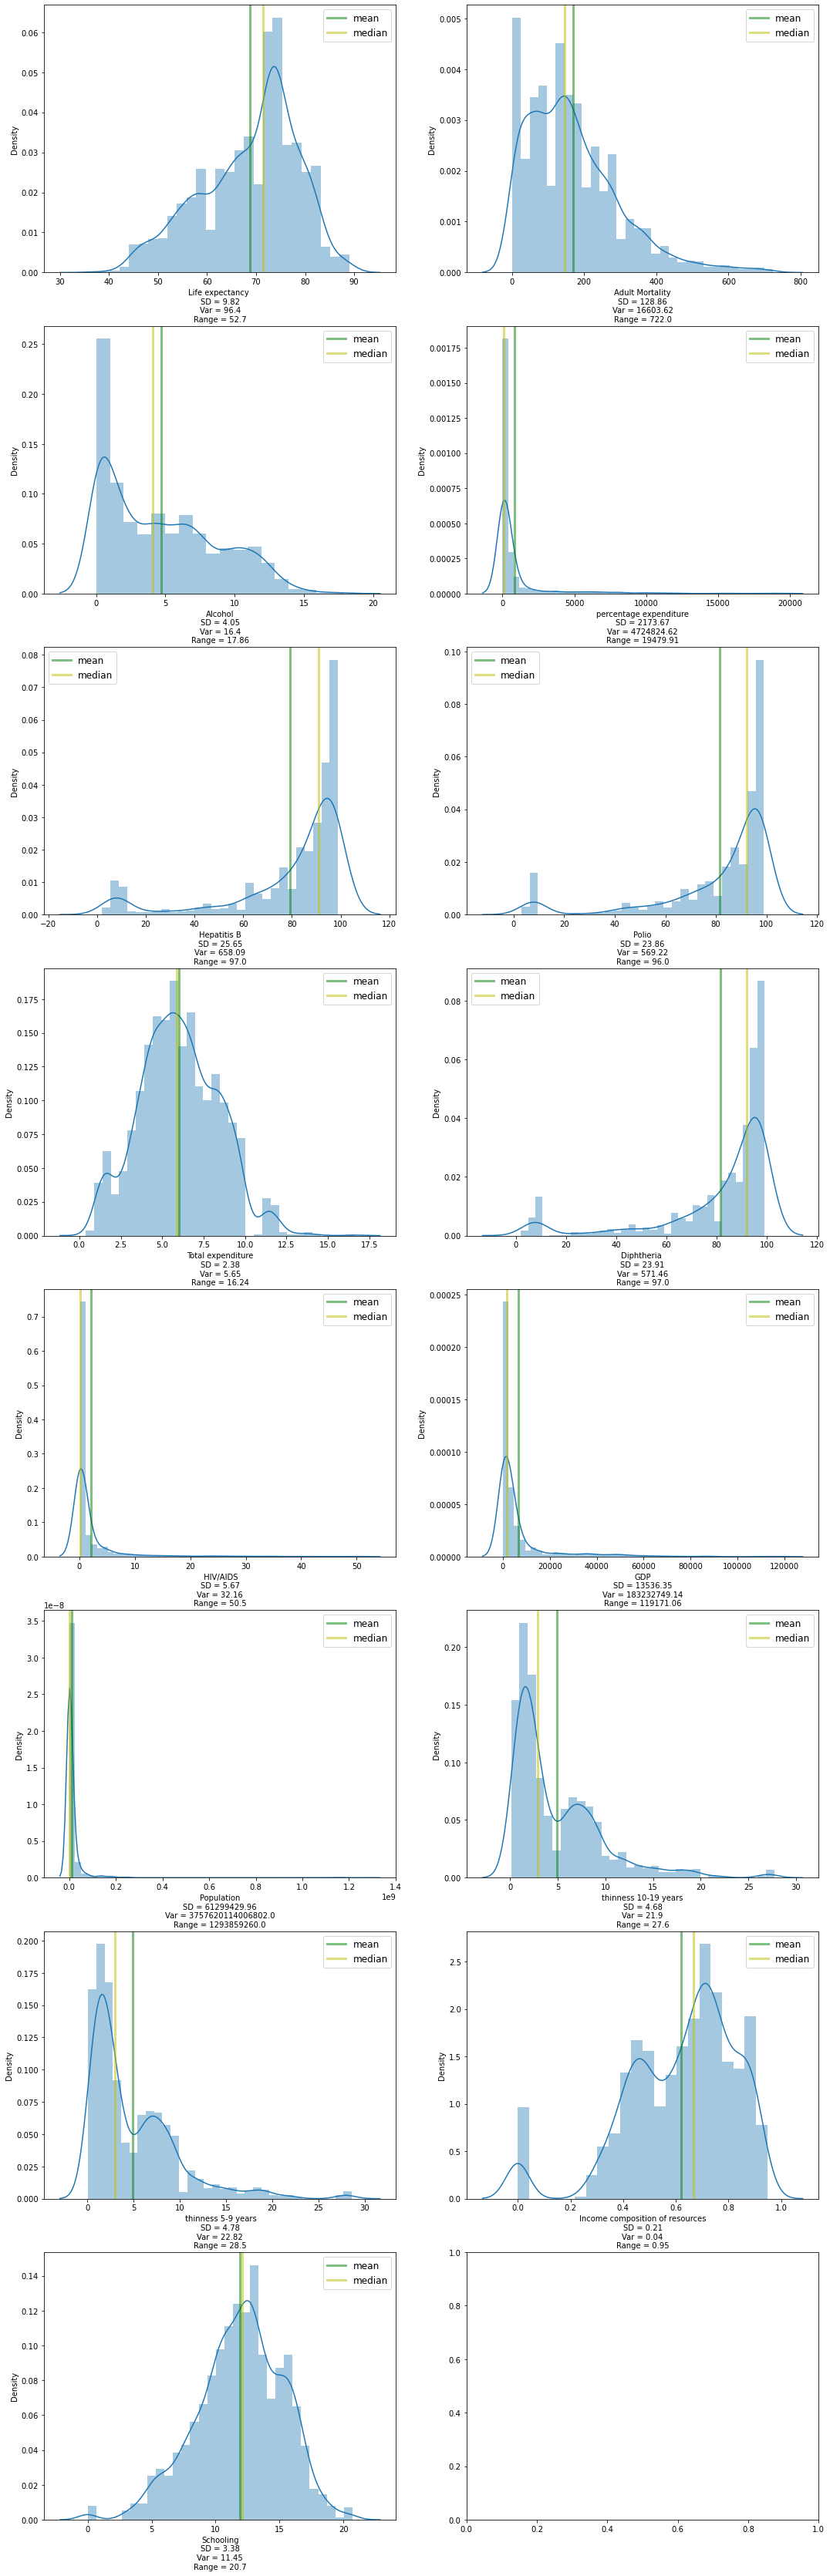

In [18]:
fig, axes = plt.subplots(8, 2, figsize=(18,60))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols):
    plot = sns.distplot(df[c], ax=axes[i])
    plot.axvline(x=df[c].mean(), linewidth=3, color='g', label="mean", alpha=0.5)
    plot.axvline(x=df[c].median(), linewidth=3, color='y', label="median", alpha=0.5)
    
    details = str(c)+'\nSD = '+str( round(df[c].std(), 2) ) + '\n' + 'Var = '+str( round(df[c].var(), 2) ) + '\n' + 'Range = ' + str(round(df[c].max()-df[c].min(), 2))
    plot.set_xlabel(details)
    axes[i].legend(loc="best", fontsize= 12)

In [19]:
for i, c in enumerate(num_cols):
    print(i+1,') ',c)
    print('\tKurtosis: ', df[c].kurt(), ', Skewness: ', df[c].skew())
    print()

1 )  Life expectancy 
	Kurtosis:  -0.3634073852236881 , Skewness:  -0.5339577605845236

2 )  Adult Mortality
	Kurtosis:  1.7133225920320485 , Skewness:  1.1731988197925494

3 )  Alcohol
	Kurtosis:  -0.7500187304292694 , Skewness:  0.5749122882159914

4 )  percentage expenditure
	Kurtosis:  22.640516155436142 , Skewness:  4.353815571514618

5 )  Hepatitis B
	Kurtosis:  2.2166075242395844 , Skewness:  -1.7926492457817318

6 )  Polio
	Kurtosis:  3.2413605526038283 , Skewness:  -1.9773751151062942

7 )  Total expenditure
	Kurtosis:  -0.06986012794416352 , Skewness:  0.18612087809245026

8 )  Diphtheria 
	Kurtosis:  3.242714049247756 , Skewness:  -1.9975263712165867

9 )   HIV/AIDS
	Kurtosis:  27.484691481015155 , Skewness:  4.8436820309879645

10 )  GDP
	Kurtosis:  15.43217268994828 , Skewness:  3.5616646898382394

11 )  Population
	Kurtosis:  295.23452812887314 , Skewness:  15.843787339647683

12 )  thinness 10-19 years
	Kurtosis:  3.8260915449885244 , Skewness:  1.740340799224345

13 )  

<center><h3> INSIGHTS </h3></center>

>Life expectancy is negatively skewed and platykurtic with few outlier’s present. Life expentency lies between 40-90 and with maximum density around 70 years.

>Infant deaths is positively skewed and highly leptokurtic. Since, the variance and standard deviation is high there are more outliers present.

>Hepatitis B is highly negatively skewed and leptokurtic. There are larger countries where immunisation is low.

POSITIVE SKEWED      | NEGATIVE SKEWED |  LEPTOKURTIC | PLATYKURTIC
:---------:|:-----------:|:-----------:|:-----------:
Adult Mortality | Life expectancy  | Adult Mortality | Life expectancy
 Alcohol| Hepatitis B | percentage expenditure | Alcohol
 percentage| Polio | Hepatitis B | Total expenditure
 expenditure | Diphtheria | Polio | 
 Total expenditure| Income composition of resources | Diphtheria | 
 HIV/AIDS| Schooling | HIV/AIDS | 
GDP |  | GDP | 
 Population| | Population | 
 thinness 10-19 years| | thinness 10-19 years | 
 thinness 5-9 years| | thinness 5-9 years | 
   | | Income composition of resources | 
  | | Schooling | 

# Bivariate Analysis

In this analysis, we will check various relationships between different measures and dimensions

### Correlation

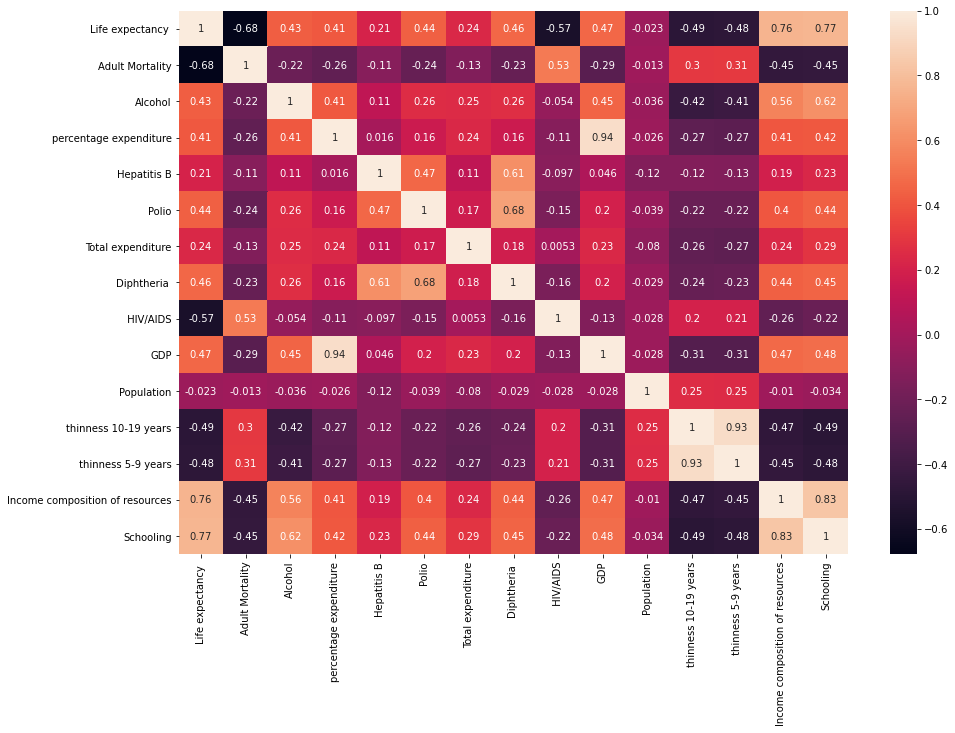

In [20]:
plt.figure(figsize=(15, 10))
_ = sns.heatmap(df[num_cols].corr(), annot=True)

#### Conclusion
 
 
>Positively Correlated:
1.  Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates
2.	Thinness 10-19 years with respect to Thinness 5-9 years is positively correlated.
3.	GDP with respect to percentage expenditure is also very much positively correlated.
4.  Life Expectancy is positively correlated with Income Composition of Resources and Schooling.

>Negatively Correlated:
1.	HIV with respect to Life expectancy is negatively correlated.
2.	Thinness 10-19 years, thinness 5-9 years are in negative correlation with respect to Life expectancy.
3.  Life Expectancy negatively correlated with Adult Mortality.

>No-Correlation:
1.	Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all).
2.	Again, HIV with respect to Total expense has a negligible correlation.
3.  Hepatitis-B has nearly no correlation with precentage expenditure.



#### Trend Analysis

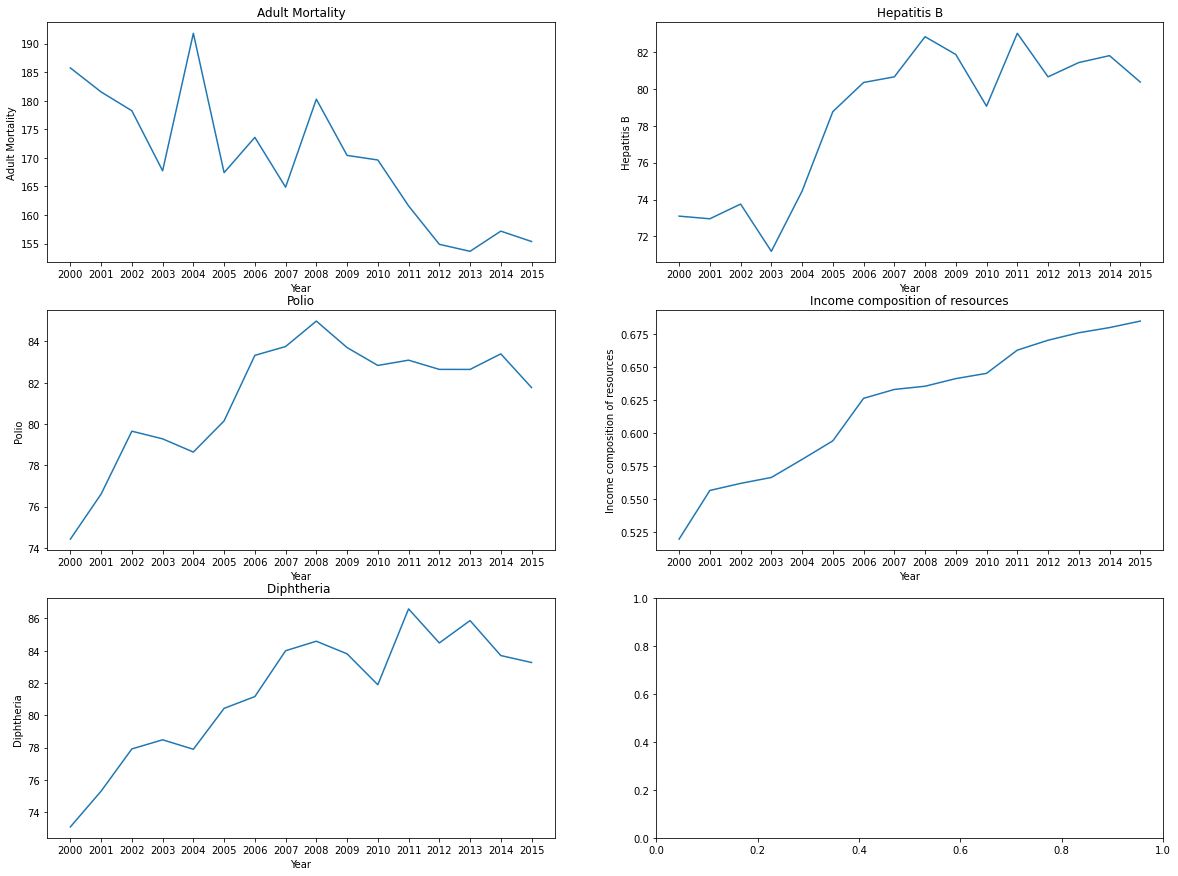

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(20,15))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(['Adult Mortality', 'Hepatitis B', 'Polio', 'Income composition of resources','Diphtheria ']):
    ageDataSN = df.groupby("Year", as_index = False)[c].mean()
    sns.lineplot(data = ageDataSN, x='Year', y=c, ax=axes[i]).set_title(c)

#### Conclusion:


1. Adult Mortality - There was a certain rise and fall in Adult Mortality from the year 2000 to 2015 but it was lowest in the year 2013.


2. Hepatitis B Immunization - From 2000 to 2003 their was a fall and a sudden peak from 2003 to 2008 and from 2008 there is a rise and fall till 2015.


3. Polio -  From 2000 to 2008 there is a rise and fall from 2008 and a slight fall till 2015.


4. Income composition of resources - There was a certain  rise in Income composition of resources from the year 2000 to 2015.


5. Diptheria - From 2000 to 2008 there is a rise and from 2008 there was a rise and fall till 2015.

## Mean Gross domestic product (GDP) of each country

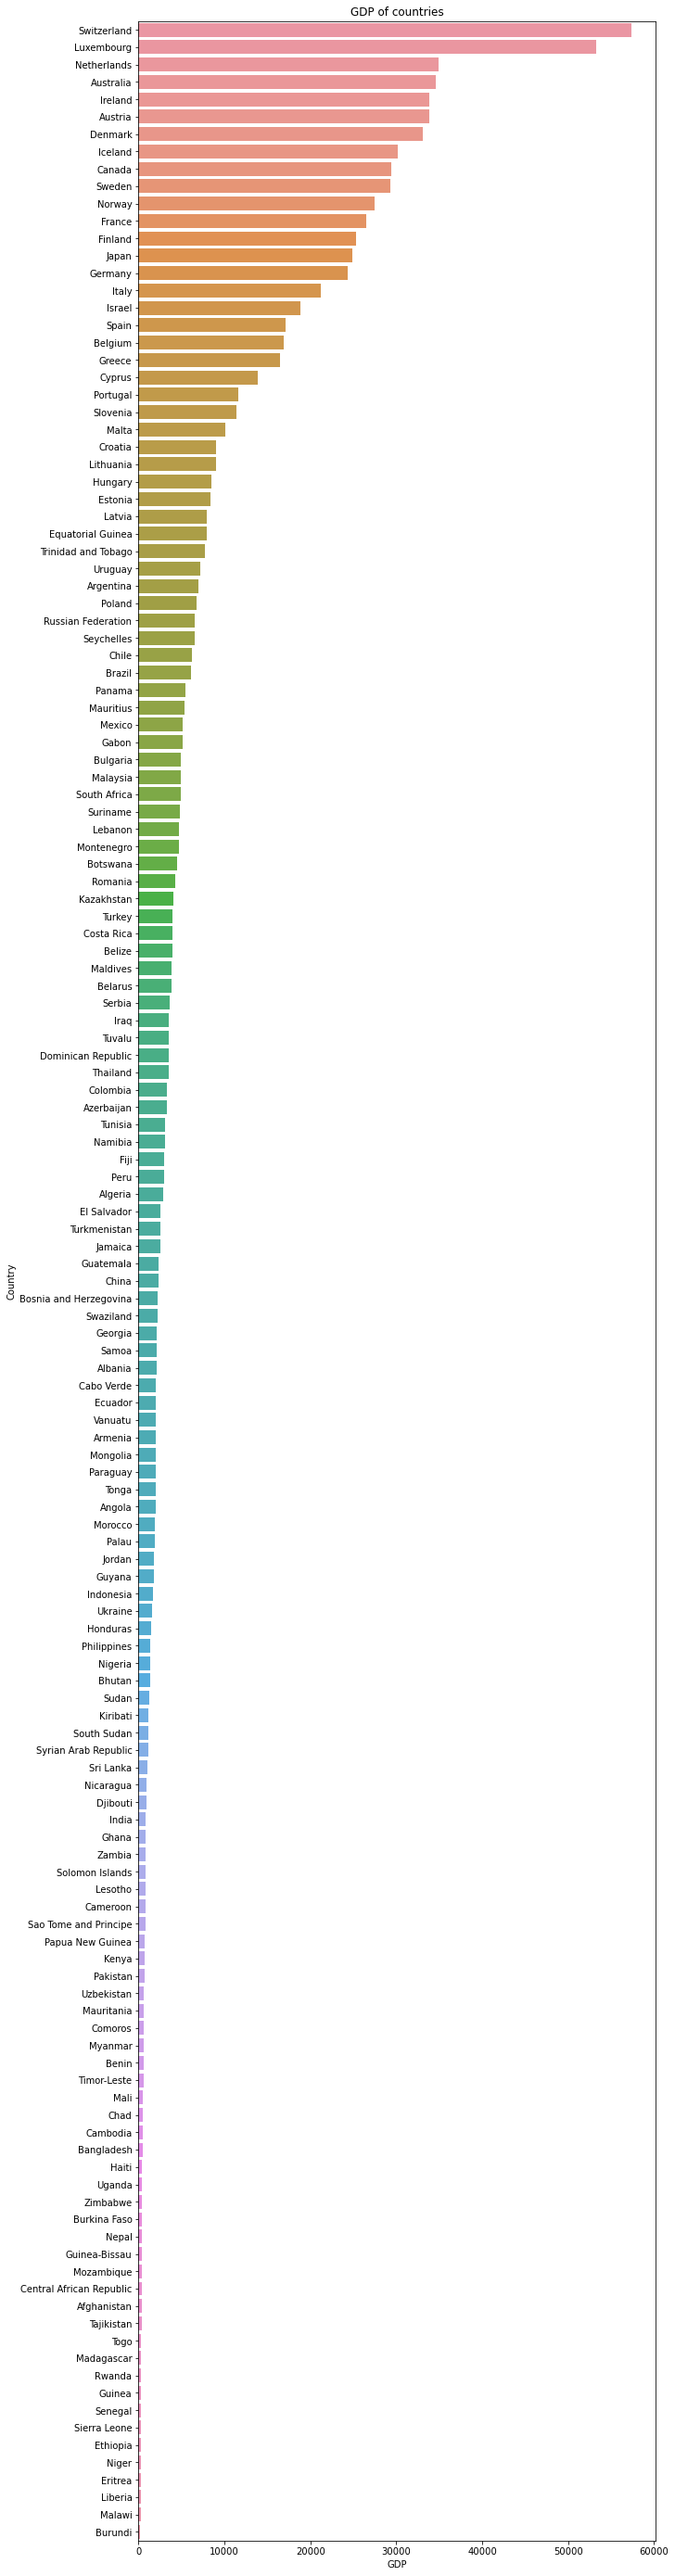

In [22]:
ageDataSN = df.groupby("Country", as_index = False)["GDP"].mean().sort_values(by="GDP",ascending = False)
plt.figure(figsize=(10,50))
sns.barplot(x = "GDP", 
            y = "Country", 
            data = ageDataSN)
plt.xlabel('GDP')
plt.ylabel('Country')
plt.title('GDP of countries')
plt.show()

## Conclusion:

After observing the above graphs we can come to a conclution that , the GDP is highest in Switzerland and the country having the lowest GDP is Burundi.

## Each Countries mean total expenditure towards the health sector 

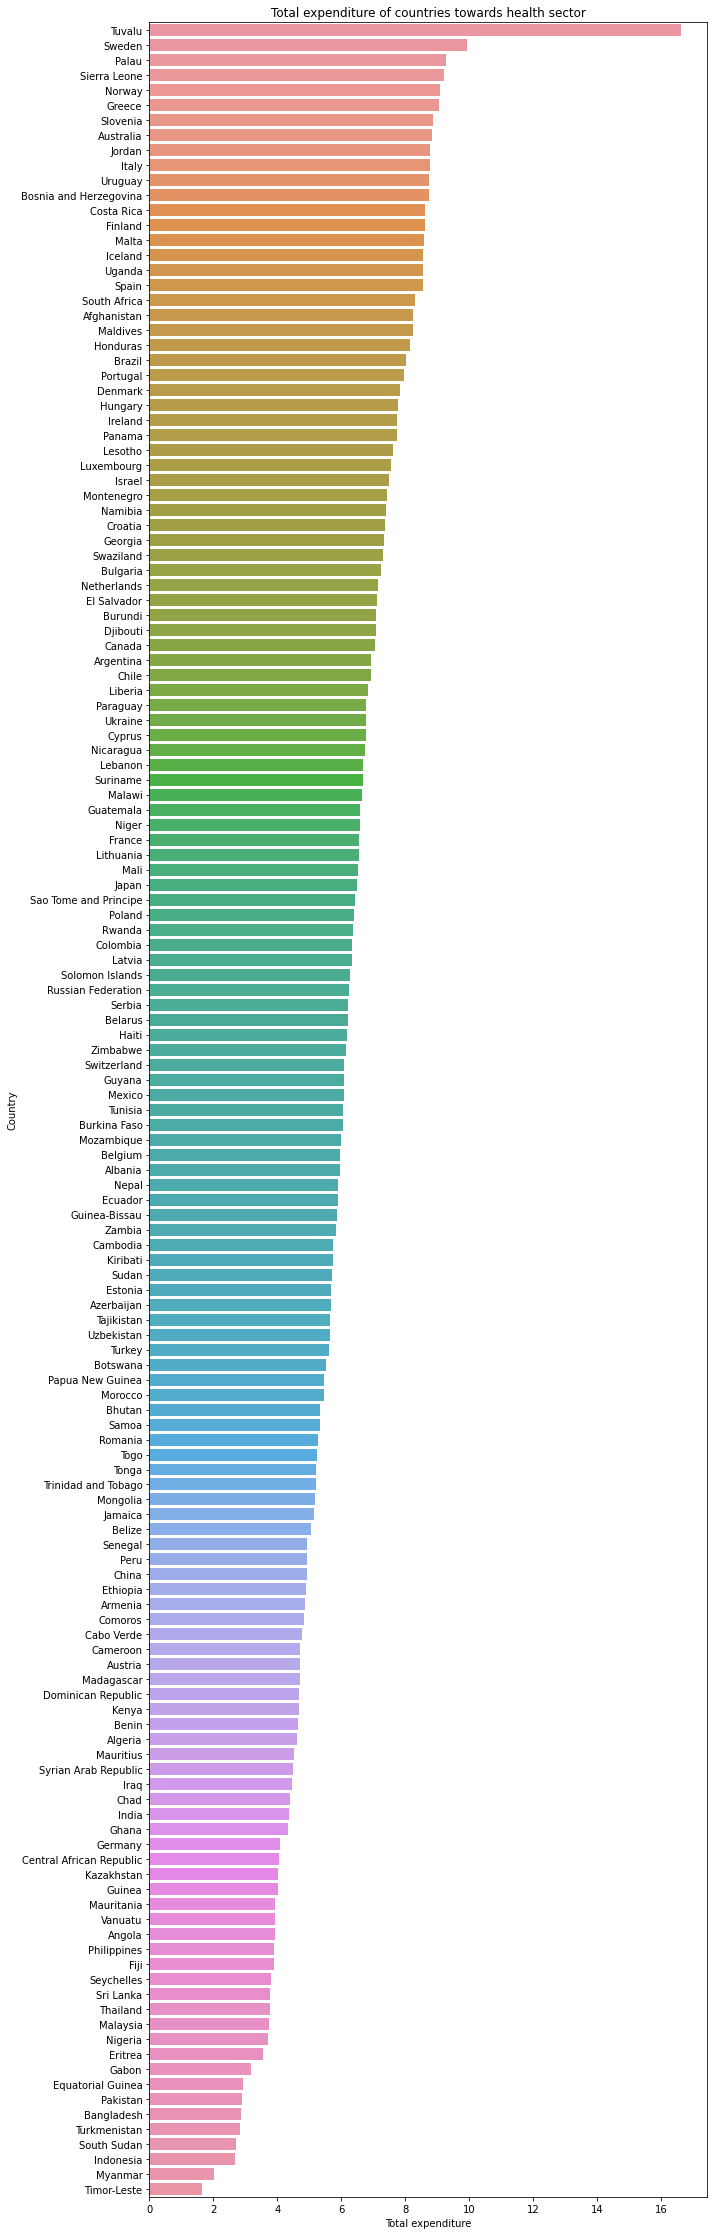

In [23]:
ageDataSN = df.groupby("Country", as_index = False)["Total expenditure"].mean().sort_values(by="Total expenditure",ascending = False)
plt.figure(figsize=(10,40))
sns.barplot(x = "Total expenditure", 
            y = "Country", 
            data = ageDataSN)
plt.xlabel('Total expenditure')
plt.ylabel('Country')
plt.title('Total expenditure of countries towards health sector')
plt.show()

### Conclusion

After observing the above graphs we can come to a conclution that ,country TUVALU has the most expenditure towards health sector and the country having the least expenditure towards health sector is Timor-Leste.

## Income composition of resources of each country

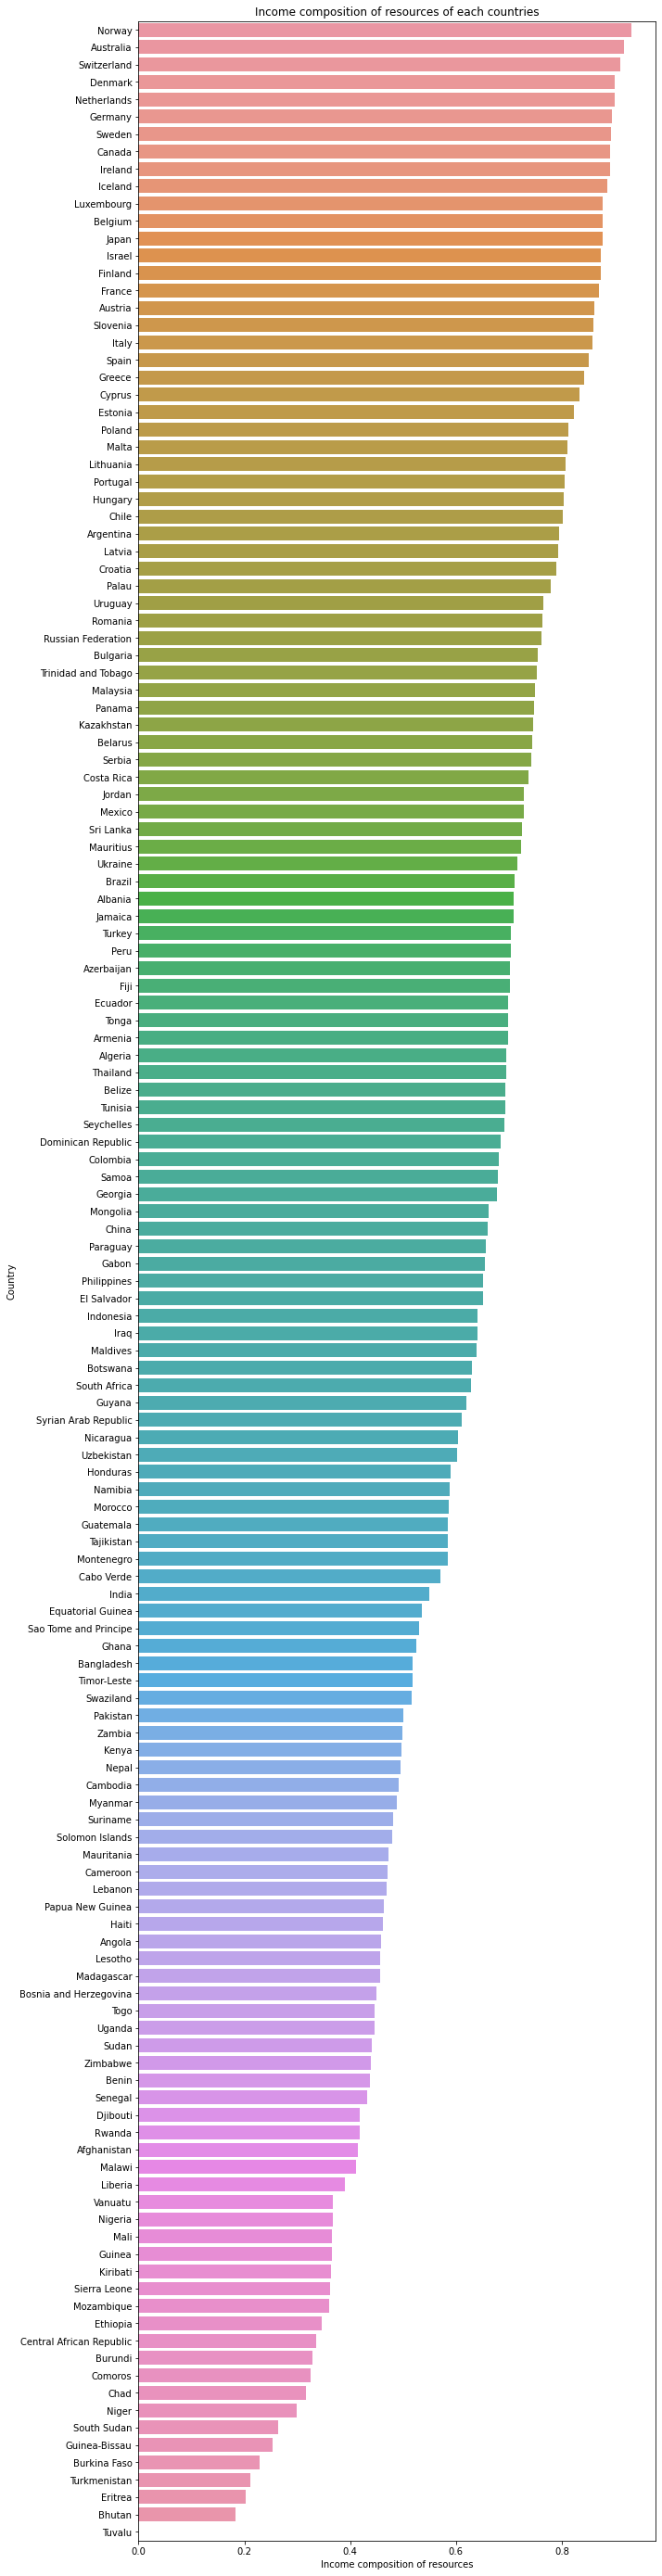

In [24]:
ageDataSN = df.groupby("Country", as_index = False)["Income composition of resources"].mean().sort_values(by="Income composition of resources",ascending = False)
plt.figure(figsize=(10,50))
sns.barplot(x = "Income composition of resources", 
            y = "Country", 
            data = ageDataSN)
plt.xlabel('Income composition of resources')
plt.ylabel('Country')
plt.title('Income composition of resources of each countries')
plt.show()

### Conclusion
After observing the above graphs we can come to a conclution that ,the country having the highest Income composition of resources is Norway and the country having the lowest Income composition of resources is Tuvalu.

## Tests

### Test-1
The term “life expectancy” refers to the number of years a person can expect to live.

Research:

Worldwide, the average life expectancy at birth was 71 years (70 years for males and 72 years for females) 
over the period 2010–2015 according to United Nations World Population Prospects 2015 Revision.

According to WHO Life expectancy increased by 5 years between 2000 and 2015.


<b>Let's claim that mean Life expectancy is less than 71</b>

In [25]:
#H0: mean Life expectancy >= 71
#HA: mean Life expectancy < 71

#Left tailed test
st.shapiro(df['Life expectancy '].dropna())

ShapiroResult(statistic=0.966968297958374, pvalue=2.2677501824891123e-22)

From the above result, we can see that the <b>p-value is less than 0.05 (alpha)</b>, 
thus we can say that the data is not normally distributed.

In [26]:
#H0: median Life expectancy >= 71
#HA: median Life expectancy < 71

M_1 = 71 #hypothesized median
Sample_data1 = np.array(df['Life expectancy '].dropna())

# calculate the difference between diameter and M_0
diff1 = Sample_data1 - M_1

# perform wilcoxon signed rank test
# pass the differnces to the parameter, 'x'
# pass the one-tailed condition to the parameter, 'alternative'
test_stat1, p_value1 = st.wilcoxon(x = diff1, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat1)
print('p-value:', p_value1)

Test statistic: 1028047.5
p-value: 1.1490205813549872e-14


<b>p-value < alpha, reject the null hypothesis (H0)</b>

Inference:
Thus, we conclude that median Life expectancy is less than 71 years

### Test-2
<b>Test the claim that life expectancy in developed countries is same as that of in the developing countries</b>

In [27]:
#The null and alternative hypothesis
# H0: Life expectancy in developed countries = Life expectancy in developing countries
# H1: Life expectancy in developed countries != Life expectancy in developing countries
# 2tailed  test

Life_expectancy_Developed = df[ df['Status'] == 'Developed' ]['Life expectancy '].dropna()
Life_expectancy_Developing = df[ df['Status'] == 'Developing' ]['Life expectancy '].dropna()

print(st.shapiro(Life_expectancy_Developed))
print(st.shapiro(Life_expectancy_Developing))

ShapiroResult(statistic=0.9804183840751648, pvalue=2.068639332719613e-05)
ShapiroResult(statistic=0.9646023511886597, pvalue=7.451252651400477e-21)


<b>p< alpha(0.05)</b> hence it does not follow normal distribution.

In [28]:
st.mannwhitneyu(Life_expectancy_Developed,Life_expectancy_Developing,  alternative = 'two-sided')

MannwhitneyuResult(statistic=705654.0, pvalue=2.0273612239180142e-157)

<b>p< alpha(0.05)</b>, reject the null hypothesis

Inference:
Life_expectancy in developed countries is different as compared to developing countries

### Test-3
<b>Test the claim that life expectancy in the top 5 developed countries is same (as per the latest results/Year)</b>

In [29]:
#Finding top 5 countries based on Life expectancy
df1 = df[['Country', 'Status', 'Life expectancy ','Year']].dropna()
df2 = df1[df1['Status']=='Developed']
df3 = df2[df2['Year']=='2015'].sort_values(by='Life expectancy ', ascending=False).head(n=5)
df3

,Country,Status,Life expectancy,Year
2345,Slovenia,Developed,88.0,2015
737,Denmark,Developed,86.0,2015
673,Cyprus,Developed,85.0,2015
1314,Japan,Developed,83.7,2015
2521,Switzerland,Developed,83.4,2015


In [30]:
#The null and alternative hypothesis
# H0: Life expectancy of top 5 developed countries is same
# H1: Life expectancy of top 5 developed countries is different

Slovenia = df[ df['Country'] == 'Slovenia' ]['Life expectancy '].dropna()
Denmark = df[ df['Country'] == 'Denmark' ]['Life expectancy '].dropna()
Cyprus = df[ df['Country'] == 'Cyprus' ]['Life expectancy '].dropna()
Japan = df[ df['Country'] == 'Japan' ]['Life expectancy '].dropna()
Switzerland = df[ df['Country'] == 'Switzerland' ]['Life expectancy '].dropna()

for i in [Slovenia, Denmark, Cyprus, Japan, Switzerland]:
    print(st.shapiro(i))
    
st.levene(Slovenia.values, Denmark.values, Cyprus.values, Japan.values, Switzerland.values)

ShapiroResult(statistic=0.8308985829353333, pvalue=0.007222290150821209)
ShapiroResult(statistic=0.8109689950942993, pvalue=0.0038231394719332457)
ShapiroResult(statistic=0.7472876310348511, pvalue=0.0005893538473173976)
ShapiroResult(statistic=0.9697969555854797, pvalue=0.8353090882301331)
ShapiroResult(statistic=0.9885005950927734, pvalue=0.9980942010879517)


LeveneResult(statistic=3.335399963081562, pvalue=0.014364588584162966)

<b>p< alpha(0.05)</b> hence it does not follow normal distribution.

In [31]:
# perform kruskal-wallis H test
test_stat1, p_val1 = st.kruskal(Slovenia, Denmark, Cyprus, Japan, Switzerland)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat1)
print('p-value:', p_val1)

Test statistic: 28.444959448047765
p-value: 1.013306762786555e-05


<b>p_value < alpha</b>, reject the null hypothesis H0. So, Life expectancy of top 5 developed countries is different

### Post-hoc test

In [32]:
data = df[(df['Country']=='Slovenia')| 
          (df['Country']=='Denmark')|
          (df['Country']=='Cyprus')|
          (df['Country']=='Japan') |
          (df['Country']=='Switzerland')]
df2 = data[['Country','Life expectancy ']]
#print(data)
#print(df2)

In [33]:
scikit_posthocs.posthoc_conover(a = df2, val_col = 'Life expectancy ', group_col = 'Country')

,Cyprus,Denmark,Japan,Slovenia,Switzerland
Cyprus,1.000000,0.469120,0.000152,0.722205,0.000558
Denmark,0.469120,1.000000,0.000011,0.711865,0.000045
Japan,0.000152,0.000011,1.000000,0.000043,0.701579
Slovenia,0.722205,0.711865,0.000043,1.000000,0.000168
Switzerland,0.000558,0.000045,0.701579,0.000168,1.000000


The Pvalue for countries (Cyprus,Japan) , (Cyprus , Switzerland),(Denmark,Japan),(Denmark,Switzerland),(Japan,Slovenia) and (Slovenia,Switzerland) is less than alpha and thus there is difference in Life expectancies between these countries

### Test-4
<b>Test the claim that population depends upon the status and Year</b>

In [34]:
df3 = df[['Status', 'Year', 'Population']].dropna()
df3

,Status,Year,Population
0,Developing,2015,33736494.0
1,Developing,2014,327582.0
2,Developing,2013,31731688.0
3,Developing,2012,3696958.0
4,Developing,2011,2978599.0
...,...,...,...
2933,Developing,2004,12777511.0
2934,Developing,2003,12633897.0
2935,Developing,2002,125525.0
2936,Developing,2001,12366165.0


In [35]:
#The null and alternative hypothesis

#Status
#H0: Population depends upon the Status
#H1: Population does not depend upon the Status

#Year
#H0: Population depends upon the Year<
#H1: Population does not depend upon the Year

m3 = ols('Population~Status+Year', data = df3).fit()
anova_table3=anova_lm(m3)
anova_table3

,df,sum_sq,mean_sq,F,PR(>F)
Status,1.0,1.817895e+16,1.817895e+16,4.834595,0.027996
Year,15.0,3.619021e+16,2.412681e+15,0.641640,0.842240
Residual,2247.0,8.449125e+18,3.760180e+15,NaN,NaN


Inference: Population depends upon the Year, but not on the status

### Test-5
<b>Test the claim that total expenditure on health is more in developed countries as compared to developing countries</b>

In [36]:
#The null and alternative hypothesis
# H0: Total_expenditure in developed countries <= Total_expenditure in developing countries
# H1: Total_expenditure in developed countries > Total_expenditure in developing countries
#Right tailed test

Total_expenditure_Developed = df[ df['Status'] == 'Developed' ]['Total expenditure'].dropna()
Total_expenditure_Developing = df[ df['Status'] == 'Developing' ]['Total expenditure'].dropna()

print(st.shapiro(Total_expenditure_Developed.dropna()))
print(st.shapiro(Total_expenditure_Developing.dropna()))

ShapiroResult(statistic=0.8786453008651733, pvalue=5.885006908255057e-17)
ShapiroResult(statistic=0.9856166243553162, pvalue=3.794298208958935e-12)


<b>p< alpha(0.05)</b> hence it does not follow normal distribution.

In [37]:
st.mannwhitneyu(Total_expenditure_Developed, Total_expenditure_Developing, alternative = 'greater')

MannwhitneyuResult(statistic=486795.5, pvalue=1.2390389855166119e-42)

<b>p_value < alpha</b>, reject the null hypothesis

Inference: Total_expenditure on health in developed countries is more as compared to developing countries

### Test-6
<b>Test that claim that proportion of Hepitatis-B immunization is same for developed and developing countires</b>

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

In [38]:
#H0: 𝑃1−𝑃2=0 ie. Proportion for Hep B immunization is same for Developed and Developing Countries
#H1: 𝑃1−𝑃2≠0 ie. Proportion for Hep B immunization is different for Developed and Developing Countries

#Here ⍺ = 0.1, for a two-tailed test calculate the critical z-value.
developed_total_hep  = df[df['Status']=='Developed']['Hepatitis B'].dropna().sum()
n1 =(len(df[df['Status']=='Developed']['Hepatitis B'].dropna()))*100
p1 = developed_total_hep/n1

developing_total_hep  = df[df['Status']=='Developing']['Hepatitis B'].dropna().sum()
n2 = (len(df[df['Status']=='Developing']['Hepatitis B'].dropna()))*100
p2 = developing_total_hep/n2

hypo_po = (n1*p1 + n2*p2)/(n1 + n2)
proportion_statistic = np.sqrt(hypo_po*(1-hypo_po)*(1/n1 + 1/n2))
z_critical = np.abs(round(st.norm.isf(q = 0.05/2), 2))
print('Z-statistic:', proportion_statistic)
print('Critical value:', z_critical)

Z-statistic: 0.002717122303265422
Critical value: 1.96


Since <b>z-statistic is less than critical value</b> we fail to reject the null hypothesis and hence, Proportion for Hep B immunization is same for Developed and Developing Countries

### Test-7

We have divided Alcohol rate into 3 groups. Below 6, between 6 and 12 and less than 12. <b>We are testing the claim that Alcohol depends on country status.</b>

| Country Status  | Alcohol below 6 | Alcohol b/w 6 and 12 | Alcohol above 12 |
| ------- | ---- | --------- | -------- |
| Developed    | 14 | 295 | 80 |
| Developing  | 1330 | 366 | 29 |

In [39]:
#H0: Relationship exists between country status and alcohol level 
#H1: Relationship does not exists between country status and alcohol level

quality_array = np.array([[14, 295, 80],[1330, 366, 29]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = st.chi2_contingency(quality_array)
st.chi2_contingency(quality_array)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 792.11897 P value 0.000000 Degrees of freedom 2


<b>P-value is less than alpha(0.05)</b> so we reject null hypothesis. Hence, Relationship does not exists between country status and alcohol level.

### Central Limit Theorem Simulation

ShapiroResult(statistic=0.9171306490898132, pvalue=1.4040643784254842e-32)


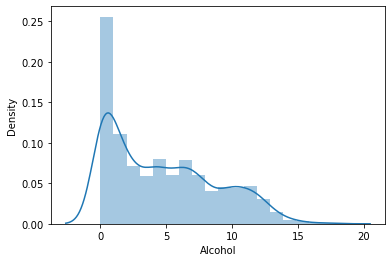

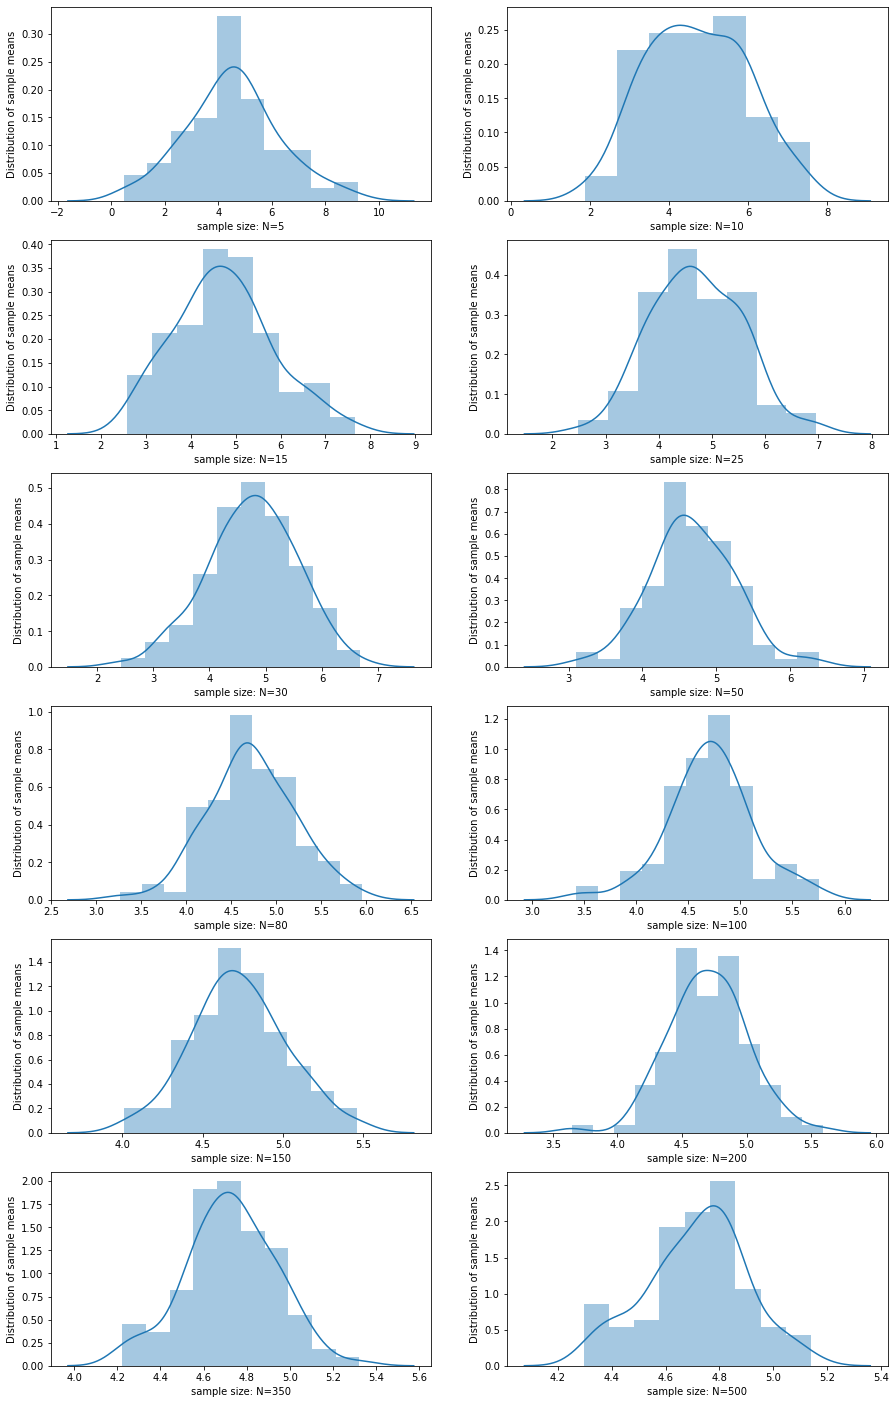

In [40]:
series1 = df['Alcohol'].dropna()
print(st.shapiro(series1))

def sample_mean_calculater(population,sample_size):
    sample_means =[]
    for i in range(100):
        sample = np.random.choice(population,size = sample_size,replace= True)
        mean = sample.mean()
        sample_means.append(mean)
    
    return sample_means

sns.distplot(series1)
list1 = [5,10,15,25,30,50,80,100,150,200,350, 500]
fig, axes = plt.subplots(6, 2, figsize=(15,25))
axes = [ax for axes_rows in axes for ax in axes_rows]
    
for i, l in enumerate(list1):
    figure = sns.distplot(sample_mean_calculater(series1,l), ax=axes[i])
    figure.set_xlabel('sample size: N=%i' %l)
    figure.set_ylabel('Distribution of sample means')

# Summary
1. The half of the population has life expentency less than 71 years.
2. Life expentency for developed countries and developing countries is different.
3. Top 5 developed countries life expentency is different.
4. Popolation depends on the year but not on the status of the country. 
5. Total expenditure in developed countries is more as compared to developing countries.
6. The proportion of Hepatitis-B immunization in developed countries and developing countries is same.
7. The alcohol level consumption rate is not dependent on country status.